<a href="https://colab.research.google.com/github/Zeeshan2012/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
resturant_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant names and Metadata.csv')
resturant_review_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant reviews.csv')

In [95]:
resturant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [96]:
resturant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


There are null values in the Collection column

#Data Preprocessing

##Rastaurant Names and Metadata
The cost column contains the commas within the price value and it is string datatype. We can remove the commas and convert them into float datatype.


In [97]:
print(resturant_data['Cost'])
resturant_data['Cost'].dtype

0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 105, dtype: object


dtype('O')

In [98]:
# replacing "," with "" (effectively removing commas) and converting the datatype to float
resturant_data['Cost'] = resturant_data['Cost'].str.replace(",","").astype('float64')

In [99]:
#We will remove Links and Timings columns as they won't be used for the analysis.
# dropping columns
resturant_data.drop(['Links','Timings'],axis=1,inplace=True)

In [100]:
resturant_data.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [101]:
#review dataset
resturant_review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [102]:
#we will rename a column Name to resturant in resturant_data dataset
resturant_data.rename(columns = {'Name':'Restaurant'},inplace = True)

In [103]:
resturant_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


There are null values in every column except Resturant and Pictures columns

In [104]:
resturant_review_data['Restaurant'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [105]:
resturant_review_data['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

There is one value in the Rating column 'Like' which doesn't give any specific score. We can remove it.

In [106]:
resturant_review_data[resturant_review_data['Rating'] == 'Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [107]:
resturant_review_data.drop(7601, axis = 0, inplace = True)

In [108]:
resturant_review_data['Rating'] = resturant_review_data['Rating'].astype('float64')

In [109]:
resturant_review_data['Rating'].dtype

dtype('float64')

The time column is in object format as well. We can convert them into datetime.

In [110]:
type(resturant_review_data['Time'][0])

str

In [111]:
# converting to datetime
import datetime
resturant_review_data['Time'] = pd.to_datetime(resturant_review_data['Time'])

#Handling Null Values
##Restaurant data

In [112]:
# missing value percentage
(resturant_data.isna().sum()/len(resturant_data))*100

Restaurant      0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
dtype: float64

The collection has more than 51 % missing values. The collection column describes the restaurant with Zomato's categories. The missing values can be replaced with "Unknown" and we can use it for some exploratory analysis. But we won't be using it for cluster analysis as the null values are too high.

In [113]:
# Replacing null values
resturant_data['Collections'].fillna('unknown',inplace=True)

# Reviews data

In [114]:
# missing value percentage
(resturant_review_data.isna().sum()/len(resturant_review_data))*100

Restaurant    0.000000
Reviewer      0.380038
Review        0.450045
Rating        0.380038
Metadata      0.380038
Time          0.380038
Pictures      0.000000
dtype: float64

The percentage of missing values is negligible and those rows can be simply dropped.

In [115]:
# Dropping the rows with missing values
resturant_review_data.dropna(inplace=True)

#Outlier Treatment
##Restaurant dataset
There's only one numerical column in Restaurant dataset. We can standardize the distribution (z-distribution) and consider every data beyond 3 standard deviation as outliers.

In [116]:
# looking at some outliers
resturant_data[((resturant_data['Cost'] - resturant_data['Cost'].mean()) / resturant_data['Cost'].std()).abs() > 3]

,Restaurant,Cost,Collections,Cuisines
56,Feast - Sheraton Hyderabad Hotel,2500.0,"Sunday Brunches, Great Breakfasts, Function Ve...","Modern Indian, Asian, Continental, Italian"
92,Collage - Hyatt Hyderabad Gachibowli,2800.0,Sunday Brunches,"Continental, Italian, North Indian, Chinese, A..."


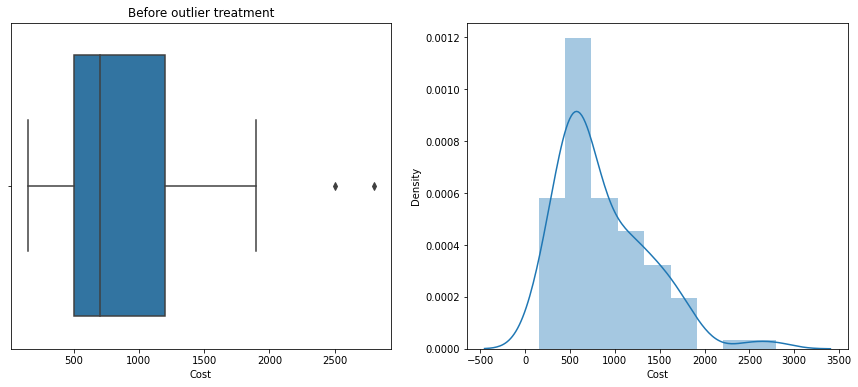

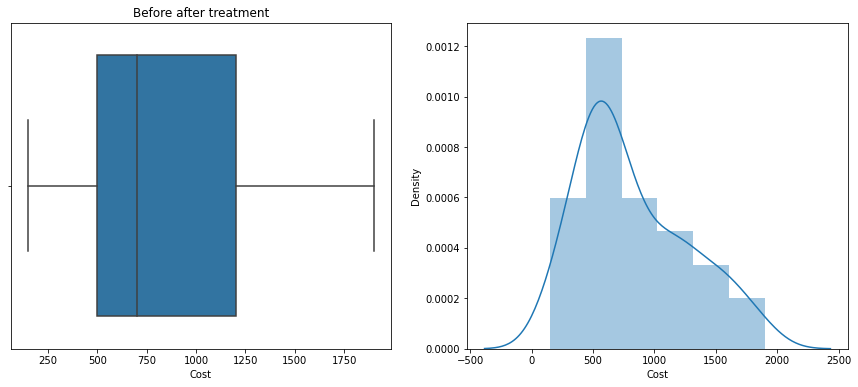

In [117]:
# removing outlier
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Before outlier treatment')
sns.boxplot(resturant_data['Cost'])
plt.subplot(1, 2, 2)
sns.distplot(resturant_data['Cost'])

# remove datapoints that are at or beyond 3 standard dev to the right
resturant_data = resturant_data[((resturant_data['Cost'] - resturant_data['Cost'].mean()) / resturant_data['Cost'].std()).abs() < 3]
# remove datapoints that are at or beyond 3 standard dev to the left (negative)
resturant_data = resturant_data[((resturant_data['Cost'] - resturant_data['Cost'].mean()) / resturant_data['Cost'].std()).abs() > -3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Before after treatment')
sns.boxplot(resturant_data['Cost'])
plt.subplot(1, 2, 2)
sns.distplot(resturant_data['Cost'])

#Reviews dataset

In [118]:
resturant_review_data.describe()

,Rating,Pictures
count,9954.000000,9954.000000
mean,3.600261,0.751959
std,1.483573,2.575819
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


There are two numerical columns in this dataset.

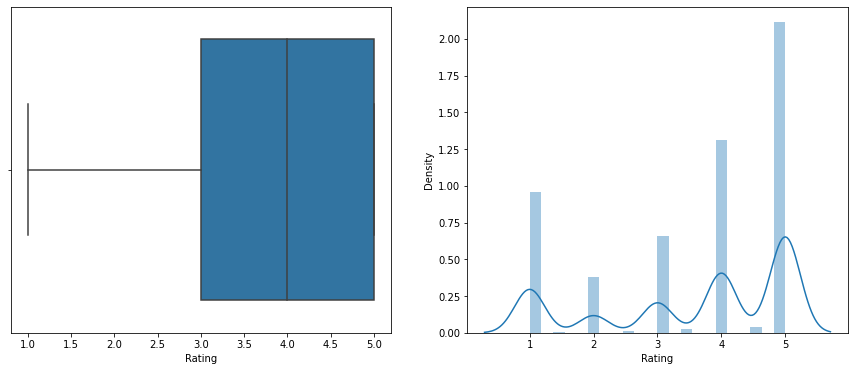

In [119]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(resturant_review_data['Rating'])
plt.subplot(1, 2, 2)
sns.distplot(resturant_review_data['Rating'])

The ratings column doesn't have any outliers.

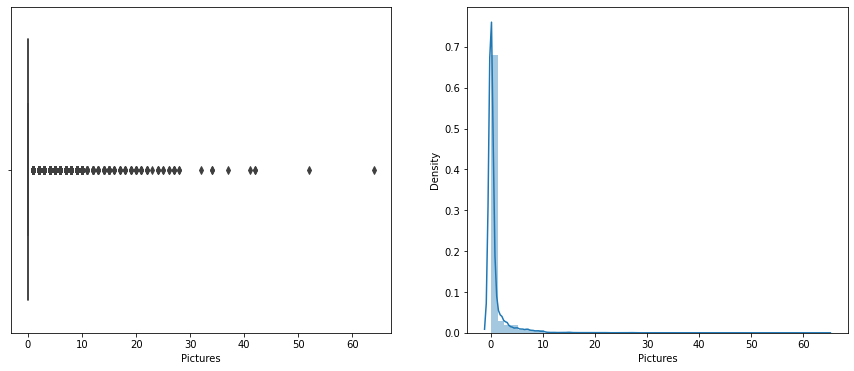

In [120]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)

sns.boxplot(resturant_review_data['Pictures'])
plt.subplot(1, 2, 2)
sns.distplot(resturant_review_data['Pictures'])

In [121]:
resturant_review_data[((resturant_review_data['Pictures'] - resturant_review_data['Pictures'].mean()) / resturant_review_data['Pictures'].std()).abs() > 3].shape

(177, 7)

The pictures column has a lot of "outliers" but we don't want to remove a lot of data simply because they contained "unusual" number of pictures. So we decide to not remove those data.


#Making list of cuisines and their count

In [122]:
# split the cuisines to list
list_of_cuisines = resturant_data.Cuisines.str.split(', ')
# add the list to the new column
resturant_data['Cuisines_list'] = list_of_cuisines

In [123]:
# column for the total number of cusines served by restaurant
resturant_data['Total Cuisines'] = resturant_data['Cuisines_list'].apply(lambda x : len(x))

In [124]:
resturant_data.head()

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",4
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...","[Biryani, North Indian, Chinese, Seafood, Beve...",5
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","[Asian, Continental, North Indian, Chinese, Me...",5


#Text processing in restaurant data
We can apply text processing methods on collection column to help us in EDA. Even though there are a lot of null values we will try to analyze it.

##Removing stopwords and punctuation

In [125]:
# download stopwords list
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Note: We replaced missing values with "unknown".

In [126]:
def remove_stopwords(text):
  '''Remove stopwords from input text'''
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

#remove punctuation
def remove_punctuation(text):
  '''
  Remove punctuation from input text
  '''
  import string
  # replacing the punctuations with '' (which effectively removes them)
  translator = str.maketrans('', '', string.punctuation)
  # return the text wihtout punctuation
  return text.translate(translator)

# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''Stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

#Collections column

In [127]:
resturant_data.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3


In [128]:
# remove punctuation and stopwords from collections column
resturant_data['Collections'] = resturant_data['Collections'].apply(remove_punctuation)
resturant_data['Collections'] = resturant_data['Collections'].apply(remove_stopwords)
resturant_data['Collections'] = resturant_data['Collections'].apply(stemming)

We are not processing Cuisines column now as it does not require many of the processes. We will process it later before clustering.

#Counting the number of words in collections

In [129]:
def length(text):
  '''
  Count the number of words in the input text
  '''
  count = 0
  for i in range(len(text)):
    if text[i] == ' ':
        count = count + 1
        
  return count+1

In [130]:
# apply the function
resturant_data['Collections_length'] = resturant_data['Collections'].apply(length)

In [131]:
resturant_data.head()

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",4,4
3,Shah Ghouse Hotel & Restaurant,800.0,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...","[Biryani, North Indian, Chinese, Seafood, Beve...",5,3
4,Over The Moon Brew Company,1200.0,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...","[Asian, Continental, North Indian, Chinese, Me...",5,13


##Reviews dataframe processing
We can extract some data and convert them to the required form.

In [132]:
# Number of reviews and followers can be separately retrieved from metadata column
resturant_review_data['no_of_reviews'], resturant_review_data['no_of_followers'] = resturant_review_data['Metadata'].str.split(',').str
resturant_review_data['no_of_reviews'] = pd.to_numeric(resturant_review_data['no_of_reviews'].str.split(' ').str[0])
resturant_review_data['no_of_followers'] = pd.to_numeric(resturant_review_data['no_of_followers'].str.split(' ').str[1])

In [39]:
# converting both columns to float
resturant_review_data['no_of_reviews'] = resturant_review_data['no_of_reviews'].astype('float64')
resturant_review_data['no_of_followers'] = resturant_review_data['no_of_followers'].astype('float64')

In [133]:
# extracting date and hour from the 'Time' column
resturant_review_data['Date'] = pd.DatetimeIndex(resturant_review_data['Time']).date
resturant_review_data['Hour'] = pd.DatetimeIndex(resturant_review_data['Time']).hour

In [134]:
# extracting weekday,month and year from Date column
resturant_review_data['weekday'] = resturant_review_data['Date'].apply(lambda x: x.weekday())
resturant_review_data['month']=resturant_review_data['Date'].apply(lambda x: x.month)
resturant_review_data['year'] = resturant_review_data['Date'].apply(lambda x: x.year)


In [135]:
# converting weekdays to their names
week_day=  {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
resturant_review_data['weekday'] = resturant_review_data['weekday'].map(week_day)
#months
month_dict = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
resturant_review_data['month'] = resturant_review_data['month'].map(month_dict)


In [136]:
# Dropping the metadata and time as the required info is retrieved
resturant_review_data = resturant_review_data.drop(['Metadata'], axis =1)
resturant_review_data = resturant_review_data.drop(['Time'], axis =1)

In [137]:
resturant_review_data.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3,2.0,2019-05-24,21,Friday,May,2019


#Exploratory Data Analysis
Restaurant dataset


Count of cuisines

In [138]:
# dictionary of  cuisine names and their count
cuisines_dict = {}
for lists in resturant_data['Cuisines_list']: 
  for name in lists:
      if (name in cuisines_dict):
          cuisines_dict[name]+=1
      else:  
          cuisines_dict[name]=1 

# dataframe from the dictionary
cuisines_df = pd.DataFrame(cuisines_dict.values(), cuisines_dict.keys(),columns = {'cuisines_counts'}).reset_index()
# sort by count
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
# rename columns appropriately
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)
cuisines_df.head(10)

,cuisines_name,cuisines_counts
5,North Indian,60
0,Chinese,42
1,Continental,19
6,Biryani,16
18,Fast Food,15
7,Asian,13
9,Desserts,13
20,Italian,12
4,South Indian,9
29,Bakery,7


Text(0, 0.5, 'Total count of cuisines (in all restaurants)')

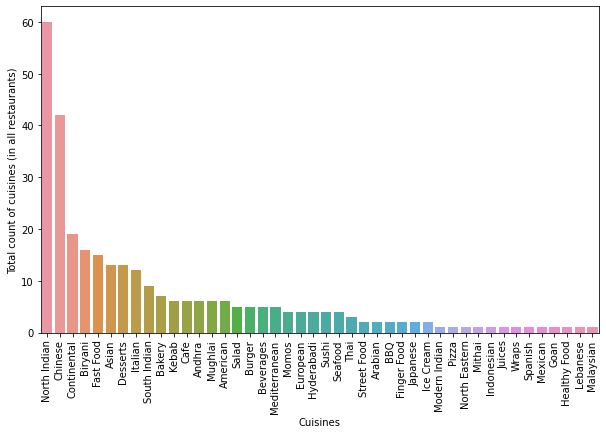

In [139]:
# plotting
fig = plt.figure(figsize=[10,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Total count of cuisines (in all restaurants)')

We can see North Indian is the most common cuisine followed by Chinese and Continental. Malaysian is the least common.

#Count of collections in all the restaurants

In [140]:
collection_list_df = resturant_data.Collections.str.split(' ')

# dictionary of collection tag and their count
collection_dict = {} 
for lists in collection_list_df: 
    for name in lists:
        if (name in collection_dict):
            collection_dict[name]+=1
        else:  
            collection_dict[name]=1 
collections_df = pd.DataFrame(collection_dict.values(), collection_dict.keys(),columns = {'collection_counts'}).reset_index()
collections_df.sort_values(by = 'collection_counts',ascending = False,inplace = True) 
collections_df.rename(columns={'index':'collection_name', 'collection_name':'collection_counts'},inplace=True)
collections_df.head(10)

,collection_name,collection_counts
23,unknown,54
4,hyderabad,17
7,great,13
8,buffet,11
3,restaur,10
0,food,9
2,rate,8
1,hygien,8
12,live,7
18,best,7


Text(0, 0.5, 'count of collections')

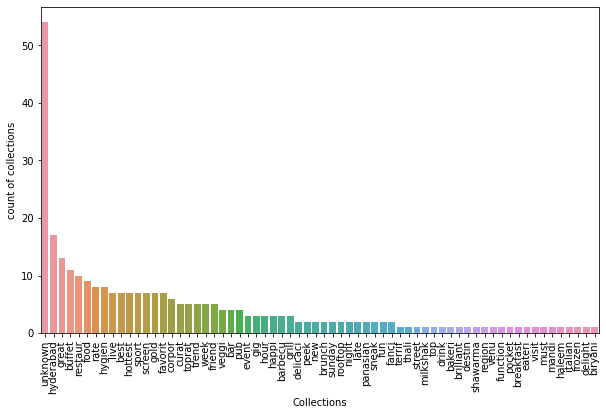

In [141]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=collections_df, x='collection_name', y= 'collection_counts')
plt.xlabel('Collections')
plt.xticks(rotation=90)
plt.ylabel('count of collections')

We can see the most common tag is 'unknown' but it refers to the missing values and not to a single tag. This is followed by 'hyderabad'.

##Comparison of cuisine with cost

Looking at the total cuisines (value scaled) at each restaurant and comparing them with the scaled cost of each restaurant.

In [142]:
# making a new df copy for this comparison
cost_df = resturant_data.copy()

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
# taking the required columns
cost_comparison_df = resturant_data[['Total Cuisines','Cost']]

# we need to scale them as Cost is at a different scale in comparison to others
scaler = MinMaxScaler()
scaled = scaler.fit_transform(cost_comparison_df)
# scaled columns
cost_df['cuisines_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
cost_df['cost_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [145]:
# new dataframes for top cuisines
cuisines_df = cost_df.sort_values(['cuisines_scaled'],ascending=False) # sorted by cuisines length

Text(0, 0.5, 'Total Cuisines (scaled)')

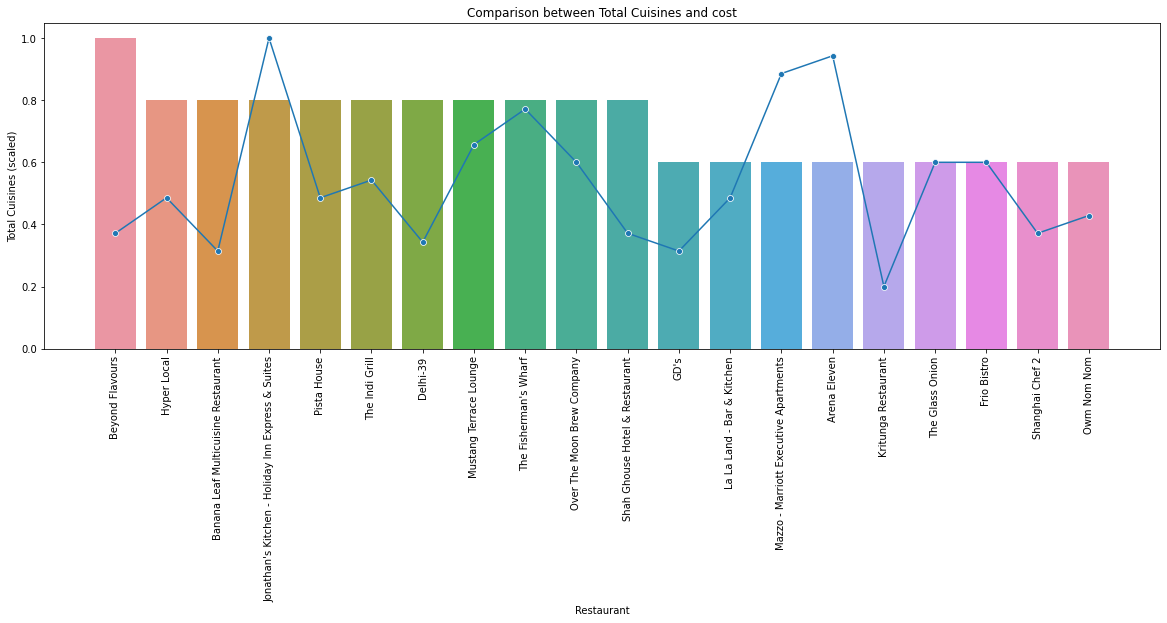

In [146]:
plt.figure(figsize=(20,6))

# cuisine and cost comparison plot
plt.xticks(rotation=90)
# plotting the total cuisines (scaled) of each restaurants
sns.barplot(x='Restaurant',y='cuisines_scaled',data = cuisines_df.head(20))
# plotting the cost (scaled) of each restaurants
sns.lineplot(x='Restaurant',y='cost_scaled',data= cuisines_df.head(20),marker='o')
plt.title('Comparison between Total Cuisines and cost')
plt.ylabel('Total Cuisines (scaled)')

From the graphs it seems like number of cuisines and cost is not correlated.

##Cost per person of each restaurant

Let us look at the average cost of each restaurant.

In [147]:
# get cost per person at each restaurant and sort them in descending order
restaurant_cost = resturant_data[['Restaurant','Cost']].sort_values(by = 'Cost',ascending = False)
restaurant_cost.head(10)

,Restaurant,Cost
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0
97,Zega - Sheraton Hyderabad Hotel,1750.0
34,Mazzo - Marriott Executive Apartments,1700.0
104,Republic Of Noodles - Lemon Tree Hotel,1700.0
90,Arena Eleven,1600.0
11,Barbeque Nation,1600.0
22,B-Dubs,1600.0
5,The Fisherman's Wharf,1500.0


Text(0.5, 1.0, 'Cost per person at Restaurants')

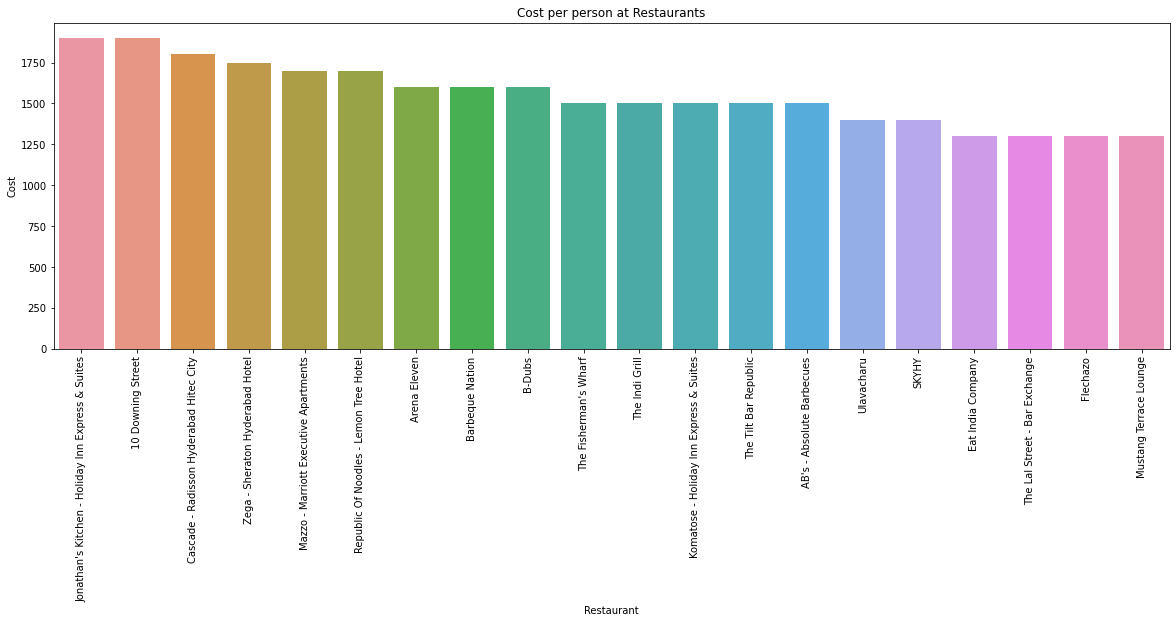

In [148]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data=restaurant_cost.head(20), x='Restaurant', y= 'Cost')
plt.xlabel('Restaurant')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('Cost per person at Restaurants')

##Comparison with ratings and cost

Looking at the average rating of each restaurant along with the cost of each restaurant.

In [149]:
# average rating of each restaurant sorted in descending order
rest_avg_rating = resturant_review_data.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
rest_avg_rating.rename(columns = {'Rating':'avg_rating'}, inplace = True)
rest_avg_rating.head()

,Restaurant,avg_rating
0,AB's - Absolute Barbecues,4.88
1,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
3,Paradise,4.70
4,Flechazo,4.66


In [150]:
# merging restaurant cost df and restaurant avg rating df (sorted by rating)
restaurants_cost_rating = rest_avg_rating.merge(restaurant_cost,on='Restaurant',how='inner')
restaurants_cost_rating.head()

,Restaurant,avg_rating,Cost
0,AB's - Absolute Barbecues,4.88,1500.0
1,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
3,Paradise,4.70,800.0
4,Flechazo,4.66,1300.0


Since both rating and cost column have different scales we have to standardize them.

In [151]:
# standardization
scaler = MinMaxScaler()
scaled = scaler.fit_transform(restaurants_cost_rating[['avg_rating','Cost']])

# new columns for scaled data
restaurants_cost_rating['avg_rating_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
restaurants_cost_rating['cost_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [152]:
restaurants_cost_rating.head()

,Restaurant,avg_rating,Cost,avg_rating_scaled,cost_scaled
0,AB's - Absolute Barbecues,4.88,1500.0,1.000000,0.771429
1,B-Dubs,4.81,1600.0,0.971774,0.828571
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0,0.951613,0.542857
3,Paradise,4.70,800.0,0.927419,0.371429
4,Flechazo,4.66,1300.0,0.911290,0.657143


Looking at top 10 restaurants by rating and compare their cost and top 10 restaurants by cost and compare their ratings.

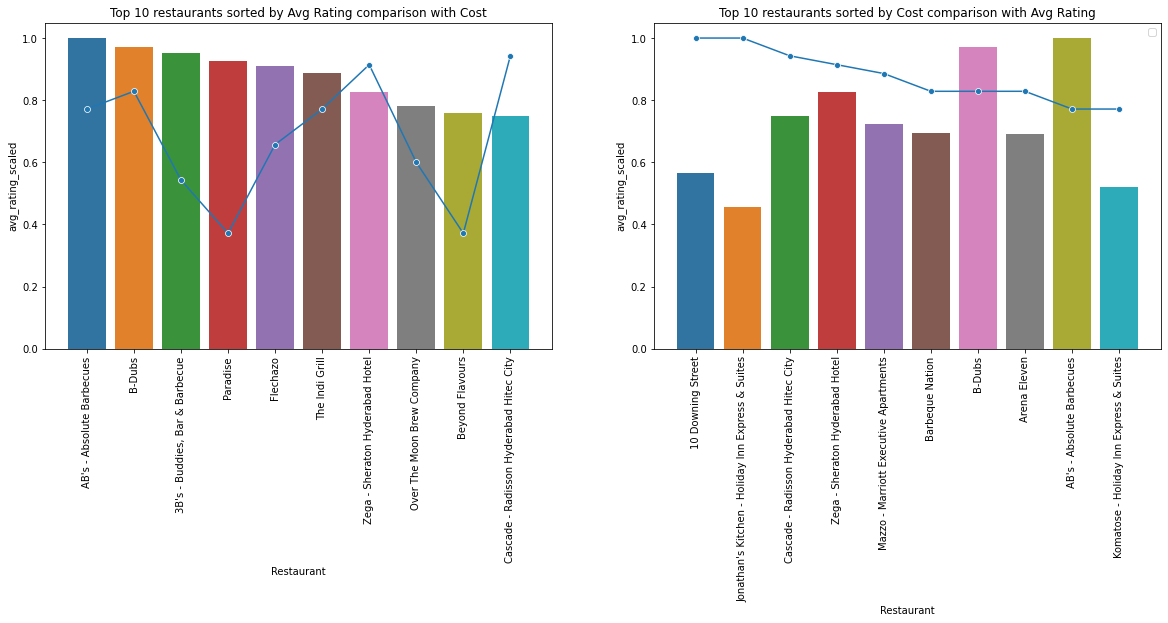

In [153]:
# sorted by rating
top_10_rating_df = restaurants_cost_rating.sort_values('avg_rating_scaled', ascending=False).head(10)
# sorted by cost
top_10_cost_df = restaurants_cost_rating.sort_values('cost_scaled', ascending = False).head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
# average rating (scaled) of each restaurant
sns.barplot(x='Restaurant',y='avg_rating_scaled',data = top_10_rating_df )
# cost (scaled) of each restaurant
sns.lineplot(x='Restaurant',y='cost_scaled',data= top_10_rating_df,marker='o')
plt.title('Top 10 restaurants sorted by Avg Rating comparison with Cost')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
# average rating (scaled) of each restaurant
sns.barplot(x='Restaurant',y='avg_rating_scaled',data = top_10_cost_df )
# cost (scaled) of each restaurant
sns.lineplot(x='Restaurant',y='cost_scaled',data= top_10_cost_df,marker='o')
plt.title('Top 10 restaurants sorted by Cost comparison with Avg Rating')
plt.legend()

Left graph has average Ratings as a bar chart (descending order) with their respective cost as a lineplot. We can see that cost and rating are not exactly correlated. There are top rated restaurants with low average cost as well.

The right graph is sorted by cost in descending order. We have the top 10 expensive restaurants. We can see a similar trend here too. The rating don't follow the same trend as cost. There are expensive restaurants with lower average ratings than relatively cheaper restaurants.

#Reviews dataset

In [154]:
resturant_review_data.head(2)

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0,2019-05-25,14,Saturday,May,2019


Restaurants with different ratings

In [155]:
resturant_review_data['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

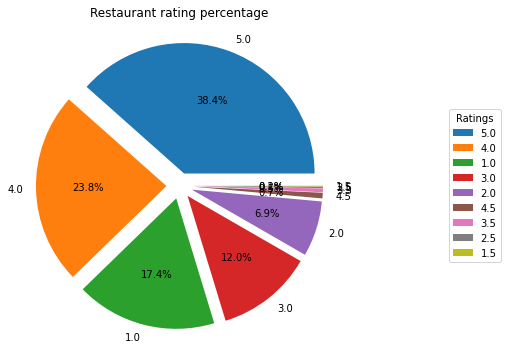

In [156]:
# plotting pie chart of percentage of ratings with different ratings
labels = resturant_review_data['Rating'].value_counts().index.tolist()
sizes = resturant_review_data['Rating'].value_counts().tolist()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5), loc = "right")
plt.title("Restaurant rating percentage")
plt.show()

A large percentage of the restaurants have 5 rating followed by 4 and 1.

Text(0.5, 0, 'Average Rating')

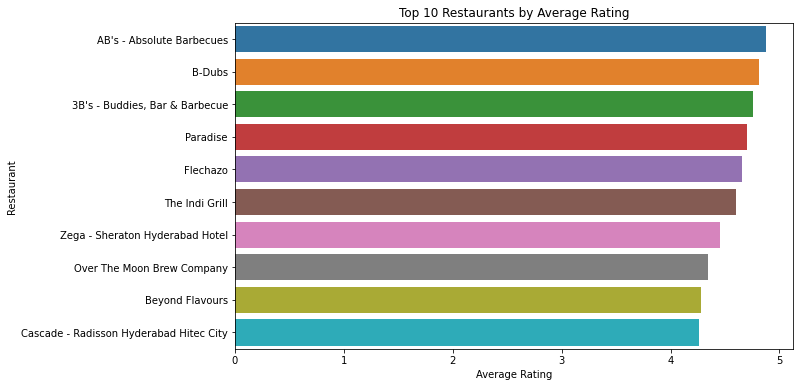

In [157]:
# average rating of restaurants sorted descending
top_restaurants_rating = resturant_review_data.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
# plotting the top 10 restaurants by avg rating
plt.figure(figsize=(10,6))
sns.barplot(data= top_restaurants_rating.head(10), x='Rating', y='Restaurant')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Average Rating')

These are the top restaurants with the highest average rating.

#Good, Bad and Average Reviews

In [158]:
reviews_eda = resturant_review_data.copy()
reviews_eda.head(3)

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2,3.0,2019-05-24,22,Friday,May,2019


In [159]:
# creating new rating column categorising the ratings into 3 sentiment types: good, bad and average

def sentiment_rating(rating):
  # Classifying ratings of 1, 1.5, 2 as 0 (not good) and 4, 4.5, 5 as 1 (good) and 2.5, 3, 3.5 as 0.5 (average)
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

# applying above function
reviews_eda["rating_classification"] = reviews_eda["Rating"].apply(sentiment_rating)

In [160]:
# Classifying the reviews as good, bad and average based on the rating classification column
good = reviews_eda.loc[reviews_eda['rating_classification'] == 1,'Review']
bad = reviews_eda.loc[reviews_eda['rating_classification'] == 0,'Review']
average = reviews_eda.loc[reviews_eda['rating_classification'] == 0.5,'Review']

In [161]:
bad.head(3)

14    We ordered corn cheese balls, manchow soup and...
66    we went for a team lunch, such a worst restaur...
75    I have been at this place for dinner a few day...
Name: Review, dtype: object

In [162]:
# create word cloud
from wordcloud import WordCloud
text1 = " ".join(good)
text2 = " ".join(bad)
text3 = " ".join(average)
word_cloud1 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'white').generate(text1)
word_cloud2 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'black').generate(text2)
word_cloud3 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'red').generate(text3)

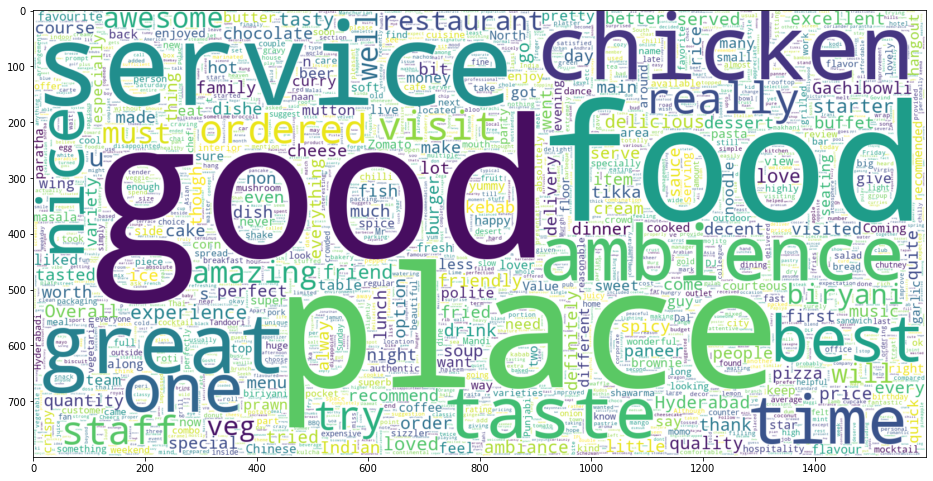

In [164]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud1,interpolation = 'bilinear')

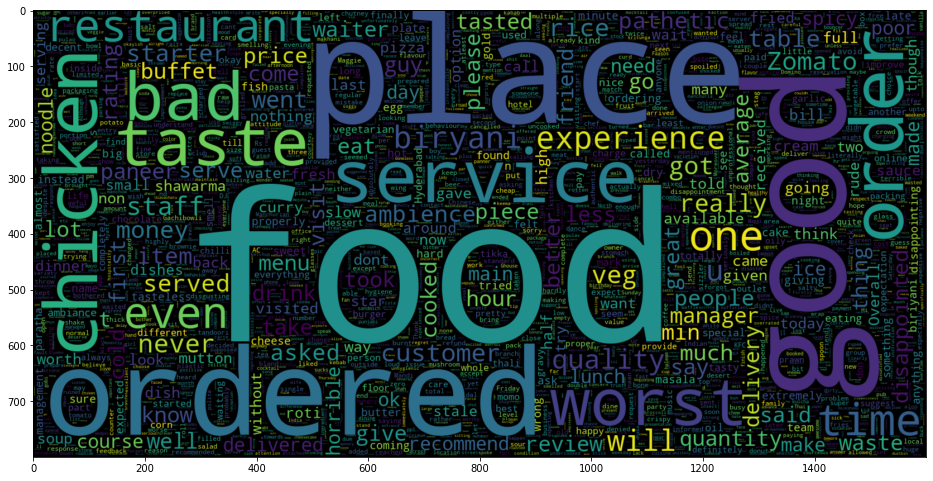

In [72]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud2,interpolation = 'bilinear')

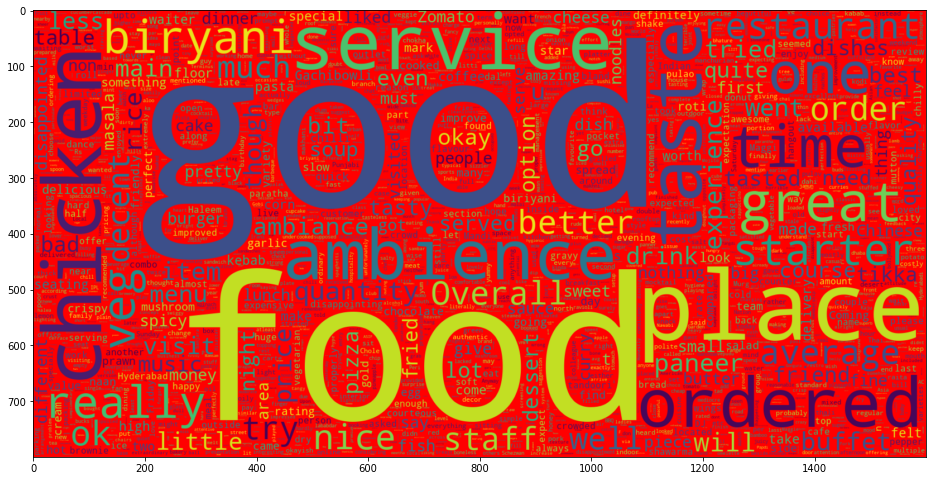

In [73]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud3,interpolation = 'bilinear')

#Feature Engineering (cluster analysis)
For clustering we are going to use the restaurant_df along with some information from the reviews_df.

##Extract Average Rating of restaurants

Top restaurant rating dataframe contains average rating of each restaurant.

In [165]:
top_restaurants_rating.head(3)

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.88
1,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76


We will create a new dataframe where the rating info (and other info from resturant_review_data) is included with the restaurant_data.

In [166]:
# merging both datasets
restaurant_review_df = resturant_data.merge(top_restaurants_rating, on = 'Restaurant', how = 'left')
# since we are including avg rating of restaurants, the column is renamed
restaurant_review_df.rename(columns={'Rating':'avg_rating'},inplace=True)
restaurant_review_df.head(3)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15,4.28
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2,4.70
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",4,4,4.66


##Extract total followers

We will also retrieve total followers and total reviews count from the reviews dataset and include them in restaurant review dataset.

In [168]:
resturant_review_data.head(2)

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0,2019-05-25,14,Saturday,May,2019


In [170]:
# total followers of each restaurant
total_followers = pd.DataFrame(resturant_review_data.groupby(['Restaurant'])['no_of_followers'].sum().reset_index())
# total reviews
total_reviews = pd.DataFrame(resturant_review_data.groupby(['Restaurant'])['no_of_reviews'].sum().reset_index())

In [171]:
total_followers.head(2)

,Restaurant,no_of_followers
0,10 Downing Street,24573.0
1,13 Dhaba,8571.0


In [172]:
# since we have added up the number of followers
# for each restaurant, we can rename columns accordingly
total_followers.rename(columns = {"no_of_followers":"total_followers"}, inplace = True)
total_reviews.rename(columns = {"no_of_reviews":"total_reviews"}, inplace = True)

In [173]:
# include total followers info in restaurant_review_df
restaurant_review_df = restaurant_review_df.merge(total_followers,on='Restaurant',how='left')
restaurant_review_df = restaurant_review_df.merge(total_reviews,on='Restaurant',how='left')
restaurant_review_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating,total_followers,total_reviews
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15,4.28,10061.0,752.0
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2,4.70,798.0,252.0


##Splitting the dataframe to categorical and numerical data

In [174]:
# the categorical data that we need
rest_text_df = restaurant_review_df[['Restaurant','Collections','Cuisines_list']]
# numerical data
rest_num_df = restaurant_review_df[['Cost','Collections_length','Total Cuisines','avg_rating','total_followers','total_reviews']]

There are some null values in Avg rating, total reviews and total followers.

In [175]:
# null values
rest_num_df.isnull().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
avg_rating            5
total_followers       5
total_reviews         5
dtype: int64

In [176]:
restaurant_review_df[restaurant_review_df['avg_rating'].isna()]

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating,total_followers,total_reviews
98,IndiBlaze,600.0,unknown,"Fast Food, Salad","[Fast Food, Salad]",2,1,NaN,NaN,NaN
99,Sweet Basket,200.0,unknown,"Bakery, Mithai","[Bakery, Mithai]",2,1,NaN,NaN,NaN
100,Angaara Counts 3,500.0,unknown,"North Indian, Biryani, Chinese","[North Indian, Biryani, Chinese]",3,1,NaN,NaN,NaN
101,Wich Please,250.0,unknown,Fast Food,[Fast Food],1,1,NaN,NaN,NaN
102,Republic Of Noodles - Lemon Tree Hotel,1700.0,panasian delicaci,"Thai, Asian, Chinese, Malaysian","[Thai, Asian, Chinese, Malaysian]",4,2,NaN,NaN,NaN


These values are missing because these restaurant data is not present in the reviews df.

In [178]:
resturant_review_data[resturant_review_data['Restaurant'] == 'Angaara Counts 3']

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_reviews,no_of_followers,Date,Hour,weekday,month,year


##Handling the null values

We will use KNN Imputer to impute the missing values.

In [179]:
from sklearn.impute import KNNImputer
# # imputer object
imputer = KNNImputer()

# Imputing missing values with KNN for the three columns
rest_num_df['avg_rating'] = imputer.fit_transform((rest_num_df['avg_rating'].values.reshape(-1,1)))
rest_num_df['total_followers'] = imputer.fit_transform((rest_num_df['total_followers'].values.reshape(-1,1)))
rest_num_df['total_reviews'] = imputer.fit_transform((rest_num_df['total_reviews'].values.reshape(-1,1)))

# Extracting Cuisines as features

As the collections variable is missing ('unknown') for a lot (51%) of the restaurants, we won't include it.

We will only use text data from cuisines column to extract features.

In [180]:
# categorical data
rest_text_df.head(3)


,Restaurant,Collections,Cuisines_list
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"[Chinese, Continental, Kebab, European, South ..."
1,Paradise,hyderabad hottest,"[Biryani, North Indian, Chinese]"
2,Flechazo,great buffet hyderabad hottest,"[Asian, Mediterranean, North Indian, Desserts]"


In [181]:
# numerical data
rest_num_df.head(3)


,Cost,Collections_length,Total Cuisines,avg_rating,total_followers,total_reviews
0,800.0,15,6,4.28,10061.0,752.0
1,800.0,2,3,4.70,798.0,252.0
2,1300.0,4,4,4.66,2748.0,667.0


In [182]:
# restaurant data
restaurant_review_df.head(3)

,Restaurant,Cost,Collections,Cuisines,Cuisines_list,Total Cuisines,Collections_length,avg_rating,total_followers,total_reviews
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",6,15,4.28,10061.0,752.0
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",3,2,4.70,798.0,252.0
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",4,4,4.66,2748.0,667.0


In [183]:
cuisine_list = []
# use restaurant df where we have a column of cuisines for each restaurant
for lists in rest_text_df['Cuisines_list']:
  for cuisine in lists:
    cuisine_list.append(cuisine)
# get unique cuisines
cuisine_set = set(cuisine_list)
cuisine_set

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [184]:
def double_word_convertor(list_):
  '''
  Looks for cuisines with two word names and joins them
  '''
  list2 = []
  for elem in list_:
    # print(elem)
    cuisine_name = elem.split()
    cuisine_name = ''.join(cuisine_name)
    list2.append(cuisine_name)
  return list2

In [185]:
# modify double worded cuisine name
rest_text_df['Cuisines_list_mod'] = rest_text_df['Cuisines_list'].apply(double_word_convertor)

In [186]:
# checking if the double worded cuisine names are joined
cuisine_list = []
# use restaurant df where we have a column of cuisines for each restaurant
for lists in rest_text_df['Cuisines_list_mod']:
  for cuisine in lists:
    cuisine_list.append(cuisine)
# get unique cuisines
cuisine_set = set(cuisine_list)
# printing the last 20 cuisines
list(cuisine_set)[-12:]

['Momos',
 'BBQ',
 'Mithai',
 'Arabian',
 'European',
 'Burger',
 'Malaysian',
 'American',
 'IceCream',
 'SouthIndian',
 'Juices',
 'Sushi']

Now that the double worded cuisines are joined we can convert the lists to single strings.

In [187]:
# convert the lists into string
rest_text_df['Cuisines'] = rest_text_df['Cuisines_list_mod'].apply(lambda x: ' '.join(x))


In [188]:
rest_text_df.head(2)

,Restaurant,Collections,Cuisines_list,Cuisines_list_mod,Cuisines
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"[Chinese, Continental, Kebab, European, South ...","[Chinese, Continental, Kebab, European, SouthI...",Chinese Continental Kebab European SouthIndian...
1,Paradise,hyderabad hottest,"[Biryani, North Indian, Chinese]","[Biryani, NorthIndian, Chinese]",Biryani NorthIndian Chinese


We don't need to do much text processing other than converting them to lowercase as the cuisine names don't contain any special symbols or numbers.

In [189]:
# converting the text to lowercase
rest_text_df['Cuisines'] = rest_text_df['Cuisines'].apply(lambda x: x.lower())


In [190]:
rest_text_df.head(3)

,Restaurant,Collections,Cuisines_list,Cuisines_list_mod,Cuisines
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"[Chinese, Continental, Kebab, European, South ...","[Chinese, Continental, Kebab, European, SouthI...",chinese continental kebab european southindian...
1,Paradise,hyderabad hottest,"[Biryani, North Indian, Chinese]","[Biryani, NorthIndian, Chinese]",biryani northindian chinese
2,Flechazo,great buffet hyderabad hottest,"[Asian, Mediterranean, North Indian, Desserts]","[Asian, Mediterranean, NorthIndian, Desserts]",asian mediterranean northindian desserts


The cuisine text of each restaurant, that contains all the available cuisines can be converted to vectors.

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfid vectorizer object
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data  
tfidf_cuisine_matrix = tfid_vectorizer.fit_transform(rest_text_df['Cuisines'])


In [192]:
# list of all the feature names (cuisines)
feature_names = tfid_vectorizer.get_feature_names()

# cuisine information is extracted from each document
# (which correspond to each restaurant) in the form of a dataframe
cuisine_vectorized_df = pd.DataFrame(tfidf_cuisine_matrix.todense(), columns = feature_names)
cuisine_vectorized_df.head()

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.208607,0.0,0.0,0.000000,0.454591,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.756722,0.0,0.0,...,0.412797,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.506128,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.258260,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.574799,0.419418,0.0,0.0,...,0.228795,0.0,0.0,0.602001,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.495494,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.252833,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [193]:
# join cuisine dataframe with the restaurant numerical dataframe
# along columns to have all info related to each restaurants together
restaurant_tfidf_df = pd.concat([rest_num_df, cuisine_vectorized_df], axis = 1)
restaurant_tfidf_df.head()

,Cost,Collections_length,Total Cuisines,avg_rating,total_followers,total_reviews,american,andhra,arabian,asian,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,800.0,15,6,4.28,10061.0,752.0,0.0,0.0,0.0,0.000000,...,0.208607,0.0,0.0,0.000000,0.454591,0.0,0.0,0.0,0.0,0.0
1,800.0,2,3,4.70,798.0,252.0,0.0,0.0,0.0,0.000000,...,0.412797,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,1300.0,4,4,4.66,2748.0,667.0,0.0,0.0,0.0,0.506128,...,0.258260,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,800.0,3,5,3.21,11843.0,1433.0,0.0,0.0,0.0,0.000000,...,0.228795,0.0,0.0,0.602001,0.000000,0.0,0.0,0.0,0.0,0.0
4,1200.0,13,5,4.34,7010.0,1831.0,0.0,0.0,0.0,0.495494,...,0.252833,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Now we have a single dataframe that has all the numerical info related to each restaurant as well as the cuisine info. The rows correspond to each restaurant (in the same order as the original dataset).

## Scaling the dataframe

Since different columns are at different range we standardize the whole dataset.

In [194]:
column_names = list(restaurant_tfidf_df.columns)

# scaler object
scaler = MinMaxScaler()
scaled = scaler.fit_transform(restaurant_tfidf_df)

# scaled dataframe
restaurant_tfidf_scaled = pd.DataFrame(scaled)
restaurant_tfidf_scaled.columns = column_names


In [195]:
restaurant_tfidf_scaled.head()

,Cost,Collections_length,Total Cuisines,avg_rating,total_followers,total_reviews,american,andhra,arabian,asian,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,0.371429,0.933333,1.0,0.758065,0.188077,0.078419,0.0,0.0,0.0,0.000000,...,0.208607,0.0,0.0,0.000000,0.500169,0.0,0.0,0.0,0.0,0.0
1,0.371429,0.066667,0.4,0.927419,0.004673,0.000000,0.0,0.0,0.0,0.000000,...,0.412797,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.657143,0.200000,0.6,0.911290,0.043282,0.065088,0.0,0.0,0.0,0.506128,...,0.258260,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.371429,0.133333,0.8,0.326613,0.223360,0.185226,0.0,0.0,0.0,0.000000,...,0.228795,0.0,0.0,0.664339,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.600000,0.800000,0.8,0.782258,0.127668,0.247647,0.0,0.0,0.0,0.495494,...,0.252833,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Now our data frame is ready for clustering.

# Clustering
We will cluster the restaurants based on the features. First we will start of with using all the features. But since we won't be able to visualise these clusters (as the number of features are high), we will also perform clustering considering pairs of features.

## Include all the features
## Hierarchical clustering

In [196]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [197]:
# including all the features in the dataset
X = restaurant_tfidf_scaled.values


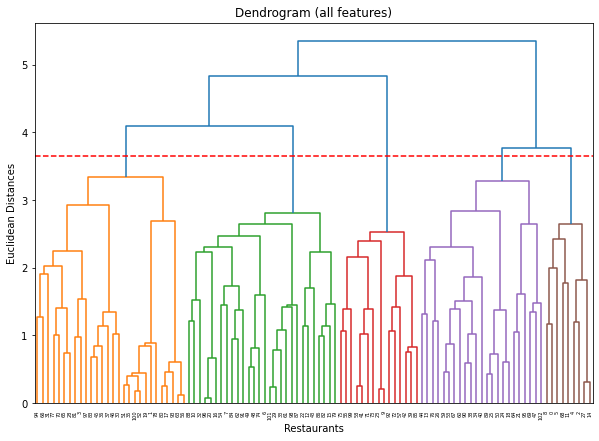

In [198]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),orientation='top',
            distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram (all features)')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
# determining the number of clusters using threshold
plt.axhline(y=3.65, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

We will decide the number of clusters by drawing a threshold line where the distance between clusters is the highest (vertical line is the longest). So we will cut it across blue horizontal lines to have 5 clusters.

## Agglomerative clustering

Agglomerative clustering involves merging data into clusters based on the distance between them in the feature space, starting from each data point as a single cluster until they form a whole single cluster or the specified number of clusters is achieved. It is a hierarchical clustering method. From the above dendrogram, it looks like 5 clusters could be optimal.

In [199]:
# agglomerative clustering with 5 clusters

agglo_cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_cluster = agglo_cluster.fit_predict(X)
score = silhouette_score(X, y_cluster)
print("Silhoutte score:",score)

Silhoutte score: 0.10839573730848434


We can also use try out a range of cluster numbers and compare them using Silhoutte scores. Silhouette score is used to evaluate the quality of clusters in terms of how well samples are clustered with other samples that are similar to each other (a negative silhoutte score implies a datapoint is closer to neighbouring cluster points than its own cluster points).

For n_clusters = 2, silhouette score is 0.10613018876502983
For n_clusters = 3, silhouette score is 0.1064957531768375
For n_clusters = 4, silhouette score is 0.09201552850521877
For n_clusters = 5, silhouette score is 0.10839573730848434
For n_clusters = 6, silhouette score is 0.09713240377241973
For n_clusters = 7, silhouette score is 0.1082585616490882
For n_clusters = 8, silhouette score is 0.12175567671210027
For n_clusters = 9, silhouette score is 0.11277055004401967
For n_clusters = 10, silhouette score is 0.12049078259749428


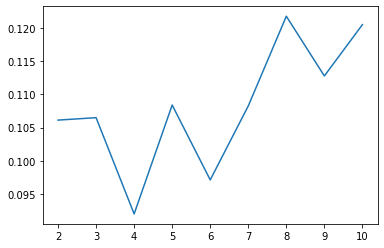

In [200]:
# using Silhoutte score for choosing cluster number
range_n_clusters = [2,3,4,5,6,7,8,9,10]
sil_score = []
for n_clusters in range_n_clusters:
  agglo_cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
  preds = agglo_cluster.fit_predict(X)
  score = silhouette_score(X, preds)
  sil_score.append(score)
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
plt.plot(range_n_clusters, sil_score)

We can chose 8 clusters because it has a high silhouette score.

In [201]:
# dataframe for storing silhoutte scores of all the models
silhouette_scores_df = pd.DataFrame(columns = ['model','optimal_clusters','silhoutte_score'])

In [202]:
# performing agglomerative clustering with 8 clusters
n_clusters = 8

agglo_cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
preds = agglo_cluster.fit_predict(X)
score = silhouette_score(X, preds)

silhouette_scores_df.loc[0] = ['Agglomerative Clustering',n_clusters,score]

# K Means clustering


In [203]:
from sklearn.cluster import KMeans


We can use elbow method to select the optimal number of clusters. We plot the sum of squared distances between data points in a cluster for each K. We find out the elbow point i.e the point where sum of squared distance reduce rapidly and the difference is negligible after.

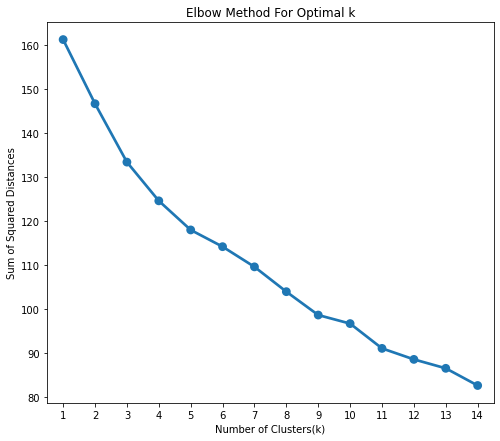

In [204]:
# elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
# Plot the graph between sum of squared distance and Number of Clusters
plt.figure(figsize=(8,7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [205]:
# using Silhoutte score for choosing cluster number
sil_score = []
for n_clusters in range(2,15):
  kmeans_cluster = KMeans(n_clusters= n_clusters)
  preds = kmeans_cluster.fit_predict(X)
  score = silhouette_score(X, preds)
  sil_score.append(score)
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.10597804490970353
For n_clusters = 3, silhouette score is 0.09827194028893976
For n_clusters = 4, silhouette score is 0.1057183508575312
For n_clusters = 5, silhouette score is 0.12116774429816919
For n_clusters = 6, silhouette score is 0.12121394696981878
For n_clusters = 7, silhouette score is 0.11485433824992354
For n_clusters = 8, silhouette score is 0.1295387008644388
For n_clusters = 9, silhouette score is 0.12701178630064616
For n_clusters = 10, silhouette score is 0.13648922704970512
For n_clusters = 11, silhouette score is 0.13726226445292472
For n_clusters = 12, silhouette score is 0.14325329678912804
For n_clusters = 13, silhouette score is 0.15387791735368184
For n_clusters = 14, silhouette score is 0.1474177480804107


In [206]:
# kmeans with 11 clusters
n_clusters = 11
kmeans = KMeans(n_clusters = n_clusters)
preds= kmeans.fit_predict(X)
# silhoutte score
score = silhouette_score(X, preds)

silhouette_scores_df.loc[1] = ['K Means Clustering',n_clusters,score]

## Validation
Silhouette score comparison for clustering (including all features) models.

In [207]:
print('All features included')
silhouette_scores_df

All features included


,model,optimal_clusters,silhoutte_score
0,Agglomerative Clustering,8,0.121756
1,K Means Clustering,11,0.148707


## Including features: Avg rating and Cost
Here we will consider only two features: avg rating and cost so that we can visualize the clusters formed.

In [208]:
X = restaurant_tfidf_scaled[['avg_rating','Cost']].values


## Hierarchical clustering


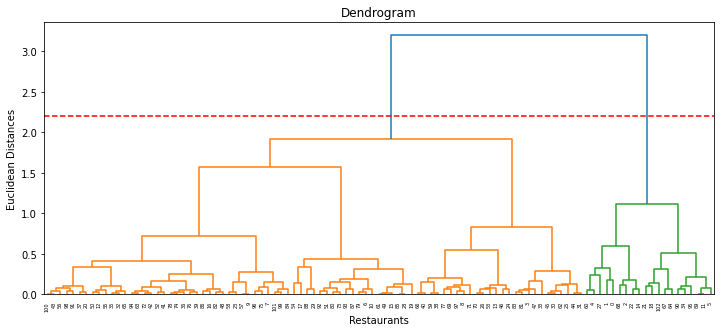

In [209]:
plt.figure(figsize=(12,5))

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),orientation='top',
            distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
# determining the number of clusters using threshold line
plt.axhline(y=2.2, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

For n_clusters = 2, silhouette score is 0.487863226642687
For n_clusters = 3, silhouette score is 0.36156292788069094
For n_clusters = 4, silhouette score is 0.4222741064527184
For n_clusters = 5, silhouette score is 0.4291206875721033
For n_clusters = 6, silhouette score is 0.4102859266546786
For n_clusters = 7, silhouette score is 0.3902326134893722
For n_clusters = 8, silhouette score is 0.38901154799349064
For n_clusters = 9, silhouette score is 0.4013553771927619
For n_clusters = 10, silhouette score is 0.41509081493534733


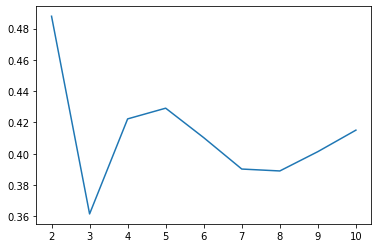

In [210]:
# comparing cluster numbers using silhoutte scores
sil_score = []
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    agglo_cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    preds = agglo_cluster.fit_predict(X)
    score = silhouette_score(X, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
plt.plot(range_n_clusters, sil_score)

In [211]:
# dataframe for storing silhoutte scores of all the models
sil_score_rating_cost_df = pd.DataFrame(columns = ['model','optimal_clusters','silhoutte_score'])


Text(0, 0.5, 'Cost')

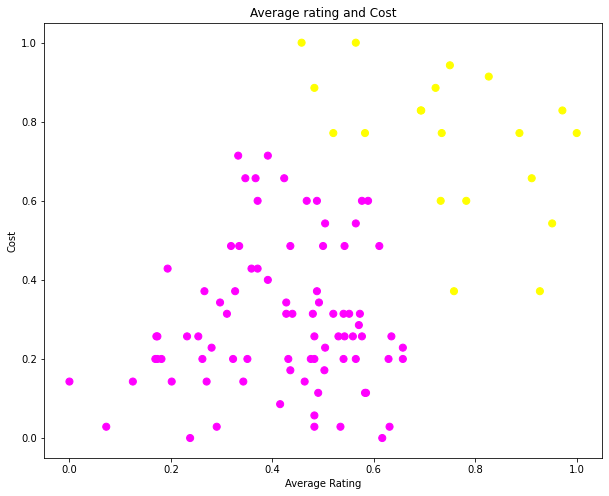

In [212]:
# clustering with n = 2 as it had the highest silhoutte score
n_clusters = 2
agglo_cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
preds = agglo_cluster.fit_predict(X)
score = silhouette_score(X, preds)

sil_score_rating_cost_df.loc[0] = ['Agglomerative Clustering',n_clusters,score]

# scatter plot of clusters
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50, cmap='spring')
plt.title('Average rating and Cost')
plt.xlabel('Average Rating')
plt.ylabel('Cost')

## KMeans Clustering


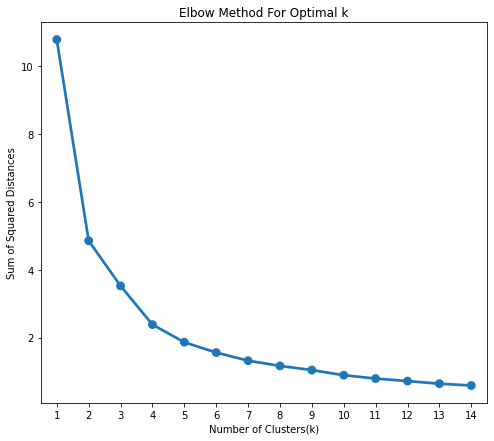

In [213]:
# choosing clusters using elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(8,7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()